In [18]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
aqi = pd.DataFrame()

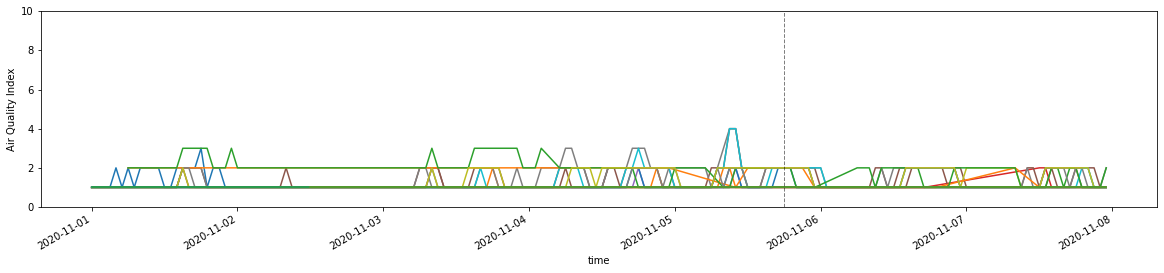

In [39]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.set_ylim(0, 10)
ax.set_ylabel('Air Quality Index')

for path in pathlib.Path().glob('*.csv'):
    site_id, _, _ = path.name.partition('_')
    
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'])
    df = df.set_index('time')
    df.name = site_id
    
    df['air_quality_index'].plot(ax=ax, label=site_id)
    
    aqi[site_id] = df['air_quality_index']
    
ax.axvline(pd.Timestamp(2020, 11, 5, 18), ls='--', lw=1, color='black', alpha=0.5)

In [40]:
aqi.head()

,S0002,S0003,S0004,S0005,S0006,S0015,S0016,S0019,S0021,S0022,...,S0037,S0038,S0039,S0042,S0044,S0045,S0046,S0047,S0048,S0051
time,,,,,,,,,,,,,,,,,,,,,
2020-11-01 17:00:00+00:00,1,NaN,1,NaN,NaN,1,1,1,1,1,...,1.0,1,1,1,1,1,1,1,NaN,1
2020-11-03 08:00:00+00:00,1,NaN,1,NaN,1.0,2,1,1,1,1,...,1.0,1,1,1,2,2,1,1,1.0,1
2020-11-03 09:00:00+00:00,1,1.0,1,NaN,1.0,2,1,1,1,1,...,1.0,1,1,1,1,1,1,1,1.0,1
2020-11-03 15:00:00+00:00,1,1.0,1,1.0,1.0,2,1,1,1,1,...,1.0,1,1,1,1,2,1,1,1.0,1
2020-11-05 07:00:00+00:00,1,1.0,1,NaN,1.0,2,1,1,1,1,...,1.0,1,1,1,2,2,1,1,1.0,1


1.1335772551512264


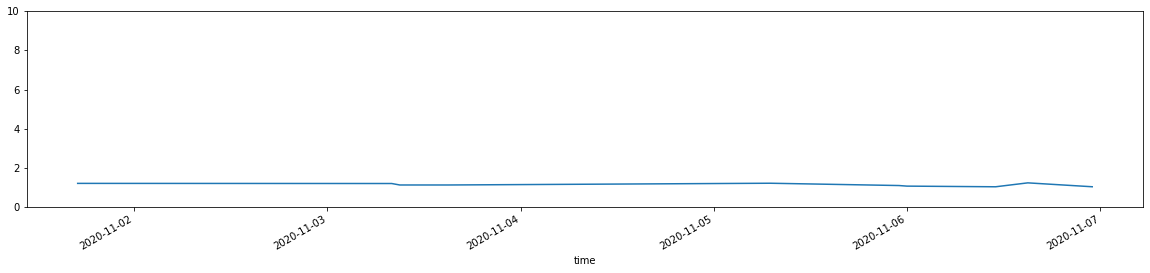

In [49]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.set_ylim(0, 10)
s = aqi.mean(axis=1)
s.plot(ax=ax)
print(s.mean())